<a href="https://colab.research.google.com/github/usaidahmed01/Pandas-Seaborn-and-Matplotlib/blob/master/class13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = sns.load_dataset('tips')
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [ ]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


Text(0, 0.5, 'Frequency')

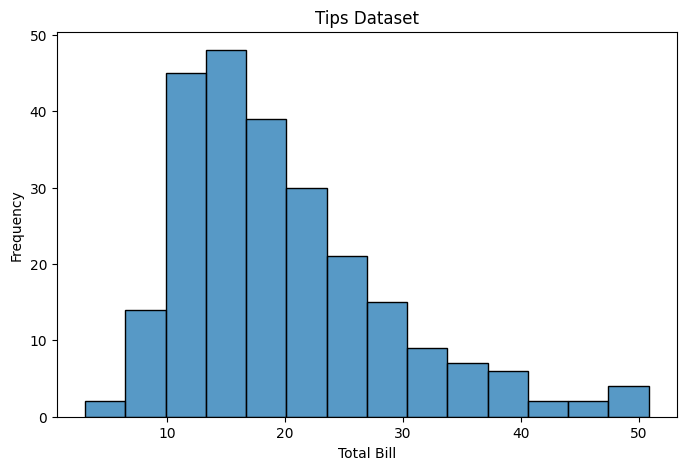

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(df['total_bill'])
plt.title('Tips Dataset')
plt.xlabel('Total Bill')
plt.ylabel('Frequency')

<Axes: xlabel='sex', ylabel='tip'>

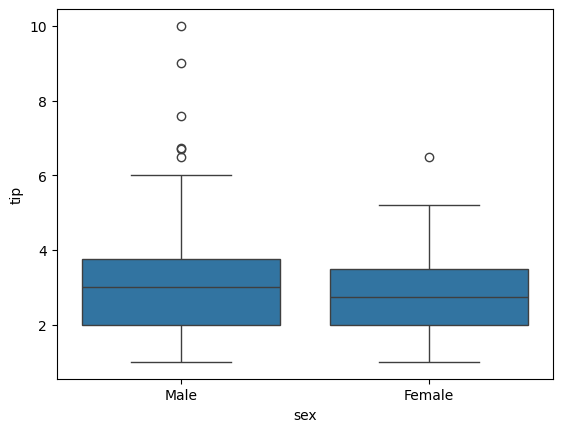

In [ ]:
sns.boxplot(x = 'sex' , y = 'tip' , data = df)

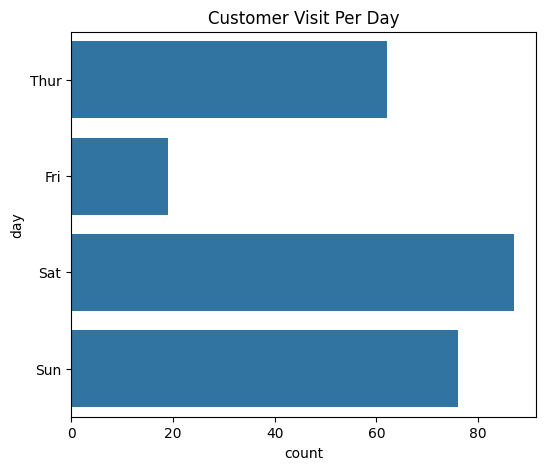

In [ ]:
plt.figure(figsize=(6,5))
sns.countplot(data = df['day']) # To check the customer visit per day. In categorical data we can use count plot
plt.title('Customer Visit Per Day')
plt.show()


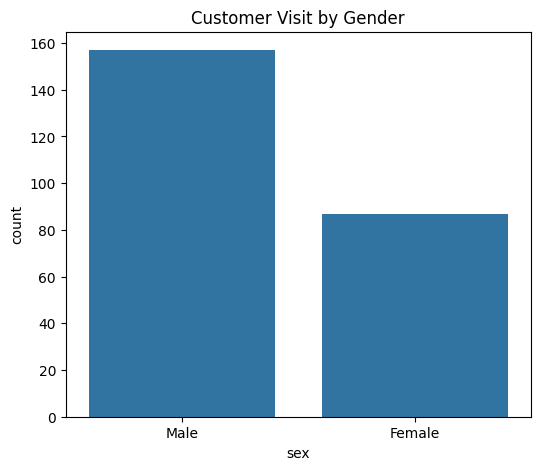

In [ ]:
plt.figure(figsize=(6,5))
sns.countplot(x = 'sex' , data = df)
plt.title('Customer Visit by Gender')
plt.show()

In [ ]:
# First we need to modify the file because it contains mostly categorical data and then we create heatmaps

df2 = df.select_dtypes(include = 'number') # it removes all the string values. also research on this
df2

,total_bill,tip,size
0,16.99,1.01,2
1,10.34,1.66,3
2,21.01,3.50,3
3,23.68,3.31,2
4,24.59,3.61,4
...,...,...,...
239,29.03,5.92,3
240,27.18,2.00,2
241,22.67,2.00,2
242,17.82,1.75,2


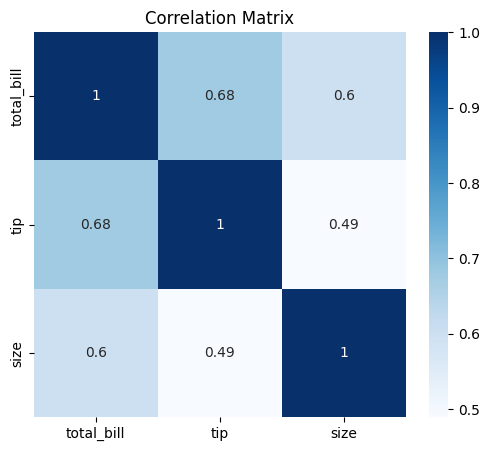

In [ ]:

plt.figure(figsize=(6,5))
sns.heatmap(df2.corr(),annot=True , cmap = 'Blues')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# Feature Engineering: Add New Data using existing data
df['Percentage_of_Tip'] = (df['tip']/df['total_bill'])*100
df

,total_bill,tip,sex,smoker,day,time,size,Percentage_of_Tip
0,16.99,1.01,Female,No,Sun,Dinner,2,5.944673
1,10.34,1.66,Male,No,Sun,Dinner,3,16.054159
2,21.01,3.50,Male,No,Sun,Dinner,3,16.658734
3,23.68,3.31,Male,No,Sun,Dinner,2,13.978041
4,24.59,3.61,Female,No,Sun,Dinner,4,14.680765
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,20.392697
240,27.18,2.00,Female,Yes,Sat,Dinner,2,7.358352
241,22.67,2.00,Male,Yes,Sat,Dinner,2,8.822232
242,17.82,1.75,Male,No,Sat,Dinner,2,9.820426


<Axes: xlabel='day', ylabel='Percentage_of_Tip'>

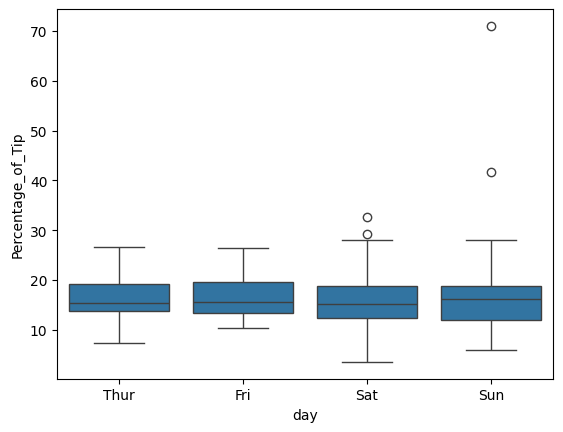

In [ ]:
sns.boxplot(y = 'Percentage_of_Tip' , x = 'day' , data = df)

In [ ]:
df['Tip_Percent'] = df['Percentage_of_Tip'].round(2).astype(str) + '%' # Convert into Perfect Percentage format
df

,total_bill,tip,sex,smoker,day,time,size,Percentage_of_Tip,Tip_Percent
0,16.99,1.01,Female,No,Sun,Dinner,2,5.944673,5.94%
1,10.34,1.66,Male,No,Sun,Dinner,3,16.054159,16.05%
2,21.01,3.50,Male,No,Sun,Dinner,3,16.658734,16.66%
3,23.68,3.31,Male,No,Sun,Dinner,2,13.978041,13.98%
4,24.59,3.61,Female,No,Sun,Dinner,4,14.680765,14.68%
...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,20.392697,20.39%
240,27.18,2.00,Female,Yes,Sat,Dinner,2,7.358352,7.36%
241,22.67,2.00,Male,Yes,Sat,Dinner,2,8.822232,8.82%
242,17.82,1.75,Male,No,Sat,Dinner,2,9.820426,9.82%


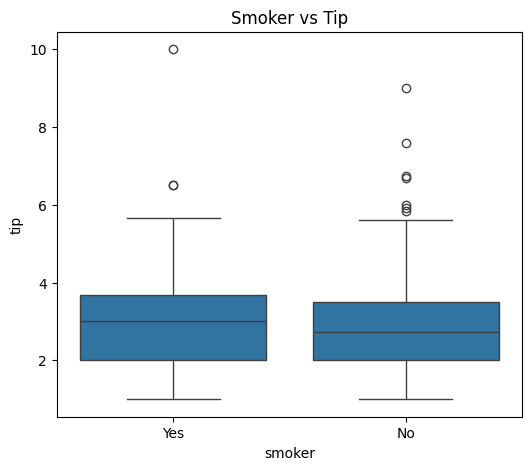

In [ ]:
plt.figure(figsize=(6,5))
sns.boxplot(x = 'smoker' , y = 'tip' , data = df)
plt.title('Smoker vs Tip')
plt.show()

In [ ]:
df.groupby('smoker')['Percentage_of_Tip'].mean() # On Average smokers and non smokers tips


/tmp/ipython-input-15-2762211054.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('smoker')['Percentage_of_Tip'].mean() # On Average smokers and non smokers tips


,Percentage_of_Tip
smoker,
Yes,16.319604
No,15.932846


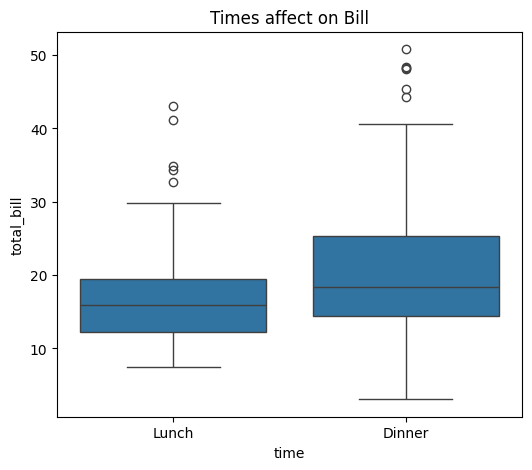

/tmp/ipython-input-16-4076369086.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('time')['total_bill'].mean()


,total_bill
time,
Lunch,17.168676
Dinner,20.797159


In [ ]:
plt.figure(figsize=(6,5))
sns.boxplot(x = 'time' , y = 'total_bill' , data = df)
plt.title('Times affect on Bill')
plt.show()

#also
df.groupby('time')['total_bill'].mean()

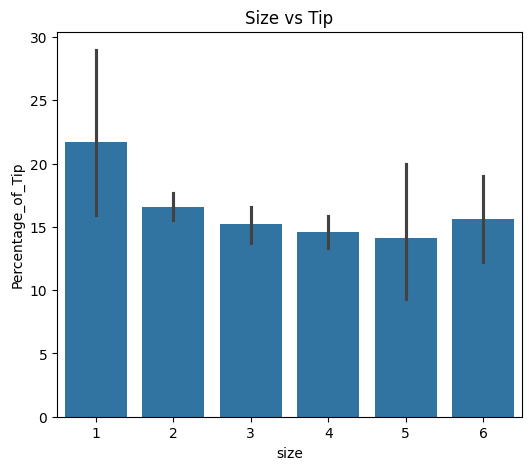

In [ ]:
plt.figure(figsize=(6,5))
sns.barplot(x = 'size' , y = 'Percentage_of_Tip' , data = df)
plt.title('Size vs Tip')
plt.show()

In [ ]:
# My Work
df.head()

,total_bill,tip,sex,smoker,day,time,size,Percentage_of_Tip,Tip_Percent
0,16.99,1.01,Female,No,Sun,Dinner,2,5.944673,5.94%
1,10.34,1.66,Male,No,Sun,Dinner,3,16.054159,16.05%
2,21.01,3.50,Male,No,Sun,Dinner,3,16.658734,16.66%
3,23.68,3.31,Male,No,Sun,Dinner,2,13.978041,13.98%
4,24.59,3.61,Female,No,Sun,Dinner,4,14.680765,14.68%


<Axes: xlabel='day', ylabel='count'>

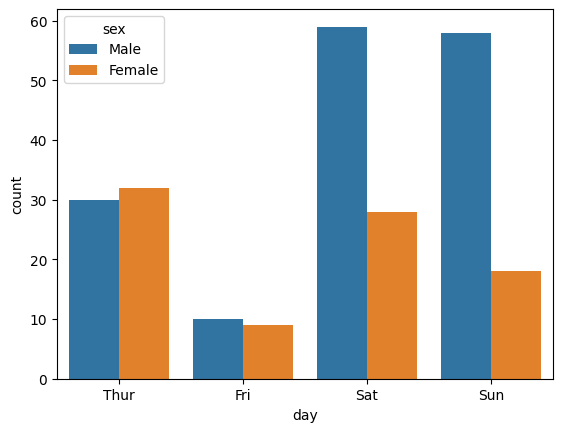

In [ ]:
sns.countplot(x = 'day' , hue = 'sex' , data = df)

In [ ]:
# Atleast five Insights with reason also outcome

/tmp/ipython-input-33-591672617.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x = 'smoker' , y = 'total_bill' ,  data = df , ci = None)
/tmp/ipython-input-33-591672617.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('smoker')['total_bill'].mean()


,total_bill
smoker,
Yes,20.756344
No,19.188278


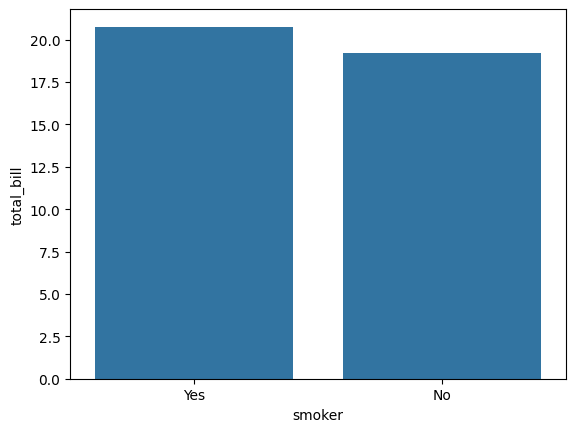

In [ ]:
# 1. From the below barplot we can see that the number of smokers are greater than number of non smokers.
# So if we make the smoker area for the smokers it will definitely increase the growth of Restuarant

sns.barplot(x = 'smoker' , y = 'total_bill' ,  data = df , ci = None)
df.groupby('smoker')['total_bill'].mean()

<Axes: xlabel='day', ylabel='count'>

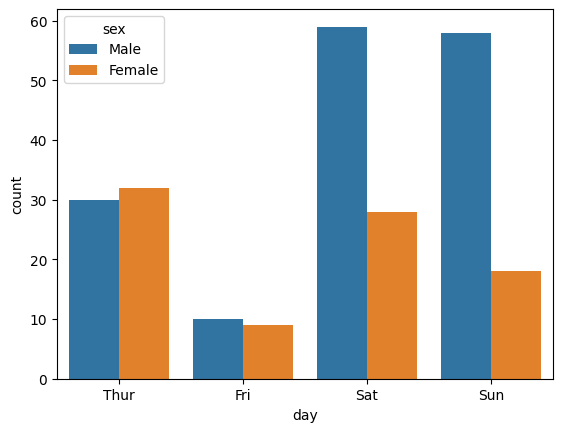

In [ ]:
# 2. We can see the on the weekend there are more cuistomers than weekdays, so try to hire more waiters for weekend.
# also Female customers are less than males, try to hire interactive waiters for female to aquire more female customers
sns.countplot(x = 'day' , hue = 'sex' , data = df)

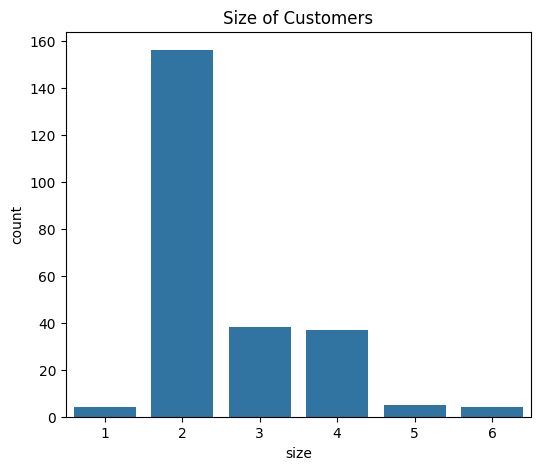

/tmp/ipython-input-48-2146285103.py:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x = 'size' , y = 'total_bill', data = df , ci = None)


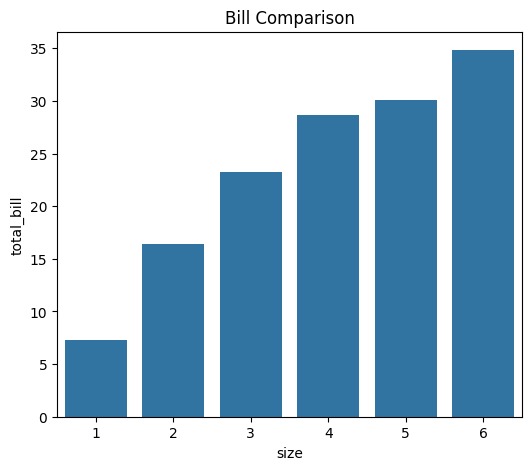

In [ ]:
# 3. from the below chart 1, (2 person) customers are the most among them. so for growing the business add 2 persons deals
#  so that the restaurant could earn more from 2 persons.
# Also add 6 persons deals and seating arrangements as well because in the 2nd chart (6 person / size) has the largest count of total bill

plt.figure(figsize=(6 , 5))
sns.countplot(x = 'size'  ,  data = df)
plt.title('Size of Customers')
plt.show()

plt.figure(figsize=(6 , 5))
sns.barplot(x = 'size' , y = 'total_bill', data = df , ci = None)
plt.title('Bill Comparison')
plt.show()

In [ ]:
# 4. Add more and special food Items in Lunch time so people would also come to the restaurant at noon

df.groupby('time')['total_bill'].mean()

/tmp/ipython-input-60-1041259671.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('time')['total_bill'].mean()


,total_bill
time,
Lunch,17.168676
Dinner,20.797159


Text(0.5, 1.0, 'Sex vs Tip')

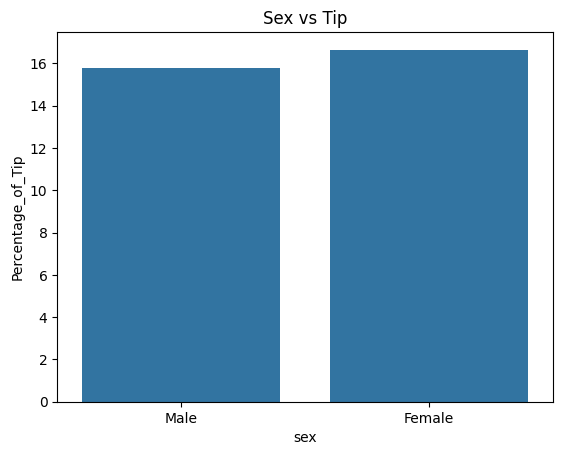

In [ ]:
# 5. Female ratio for The Percentage of Tip is greater than male but the number of male customer is more than female customer so we can do is to make the family hall or the room that has some privacy,
#  so it will increase the ratio of female if the ratio of female increases then the percentage of tip also increases
df

dfMale = df[df.sex == 'Male']
dfMale.count()
dfFemale = df[df.sex == 'Male']
dfFemale.count()
sns.barplot(x = 'sex' , y = 'Percentage_of_Tip' , data = df , errorbar = None)
plt.title('Sex vs Tip')
